# Storytelling - Visualizaciones en Python - Macroeconomía Peruana
**Tópicos de Economía de la Empresa - E2TEE9**

### PRIMERA PRÁCTICA INDIVIDUAL

### **Nombres: Luis Edward Velo Poma**

- La práctica será desarrollada en Jupyter Notebook
- Debe ser entregada hasta el lunes 16 de setiembre a las 9:00. Cada hora adicional implica un punto menos en la calificación. 
- La práctica está diseñada para que la terminen en menos de cuatro horas. Pueden consultar sus notas de clase y cualquier otra fuente que sea necesaria para responder las preguntas. En caso quieran citen directamente a algún autor, hagan la referencia necesaria. 
- Las preguntas tienen un componente de programación y un componente de conocimiento económico. Para el segundo componente, sugiero hacer una búsqueda rápida biblográfica para sustentar los insights de sus respuestas. 
- La calificación de cada una de las 10 preguntas se divide de la siguiente manera: 
        Planteamiento correcto del problema [0.5 puntos]
        Ejecución correcta de código en Python [1 punto]
        Interpretación y comentario [0.5 puntos]

In [615]:
#Importando librerias importantes para trabajar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from decimal import Decimal
import warnings
warnings.filterwarnings('ignore')

In [616]:
pd.set_option('display.max_columns', None) #Mostrando máximo de columnas

#leyendo la data limpia
data = pd.read_csv(r'C:\Users\USER\Desktop\storytelling\Proyecto_Storytelling_practica_1-1\Proyecto\data\final_economia_bcrp.csv')
data

,Año,Peru_inflación,Peru_PBI_por,PBI,Demanda Interna,Consumo Privado,Consumo Publico,Inversion Bruta Interna,Inversion Bruta Fija,Inversion Bruta Fija - Privada,Inversion Bruta Fija - Publica,Exportaciones de BBySS,Importaciones de BBySS,PBI Agropecuario,PBI Pesca,PBI Mineria e Hidrocarburos,PBI Manufactura,PBI Electricidad y Agua,PBI Construccion,PBI Comercio,PBI Servicios,PBI Sectores Primarios,PBI Sectores no Primarios,Inversion Publica,Resultado economico SPNF,EEUU_PBI_por,EEUU_inflación,Tipo_de_cambio_dólares
0,1922.0,-4.7,5.1,14122.0,12688.0,10616.0,630.0,1442.0,1783.0,NaN,NaN,2845.0,1410.0,2519.0,NaN,1650.0,1774.0,19.0,592.0,1987.0,5582.0,4169.0,9953.0,NaN,NaN,6.0,-2.3,0.0
1,1923.0,-5.1,4.5,14756.0,13103.0,10437.0,677.0,1989.0,2154.0,NaN,NaN,3358.0,1705.0,2522.0,NaN,1858.0,1853.0,20.0,660.0,2037.0,5807.0,4380.0,10377.0,NaN,NaN,12.7,2.4,0.0
2,1924.0,3.8,8.9,16070.0,14566.0,11335.0,796.0,2435.0,2519.0,NaN,NaN,3515.0,2012.0,2625.0,NaN,2219.0,1930.0,21.0,729.0,2182.0,6364.0,4844.0,11226.0,NaN,NaN,3.8,0.0,0.0
3,1925.0,7.1,3.1,16575.0,15162.0,11272.0,873.0,3017.0,2696.0,NaN,NaN,3391.0,1978.0,2555.0,NaN,2456.0,2005.0,22.0,736.0,2187.0,6614.0,5012.0,11564.0,NaN,NaN,2.4,3.5,0.0
4,1926.0,0.6,9.4,18130.0,15776.0,11798.0,1048.0,2931.0,2897.0,NaN,NaN,4343.0,1989.0,2752.0,NaN,2914.0,2135.0,23.0,820.0,2314.0,7172.0,5666.0,12464.0,NaN,NaN,5.9,-1.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017.0,2.8,2.5,514215.0,503469.0,329870.0,59191.0,114408.0,116227.0,93193.0,23034.0,140989.0,130243.0,27328.0,1921.0,71823.0,64669.0,9412.0,29748.0,55767.0,253546.0,101072.0,413143.0,4.6,-3.0,2.3,2.1,3.3
96,2018.0,1.3,4.0,534665.0,523912.0,342501.0,59417.0,121994.0,121329.0,97029.0,24300.0,144059.0,133306.0,29429.0,2838.0,70749.0,68475.0,9826.0,31335.0,57243.0,264771.0,103016.0,431649.0,4.7,-2.3,2.9,1.9,3.3
97,2019.0,2.1,2.2,546605.0,535578.0,353615.0,60702.0,121260.0,125337.0,101406.0,23930.0,145697.0,134669.0,30471.0,2351.0,70715.0,67336.0,10212.0,31788.0,58960.0,274328.0,103537.0,442624.0,4.6,-1.6,2.3,2.3,3.3
98,2020.0,1.8,-11.0,486402.0,482670.0,318739.0,65414.0,98517.0,105022.0,84694.0,20328.0,117099.0,113367.0,30784.0,2450.0,61229.0,58894.0,9585.0,27492.0,49539.0,246014.0,94463.0,391524.0,4.3,-8.9,-3.4,1.4,3.5


## Pregunta 1:

#### Mostrar un gráfico de línea que muestre el promedio móvil de cinco años de la inflación desde el año 1995

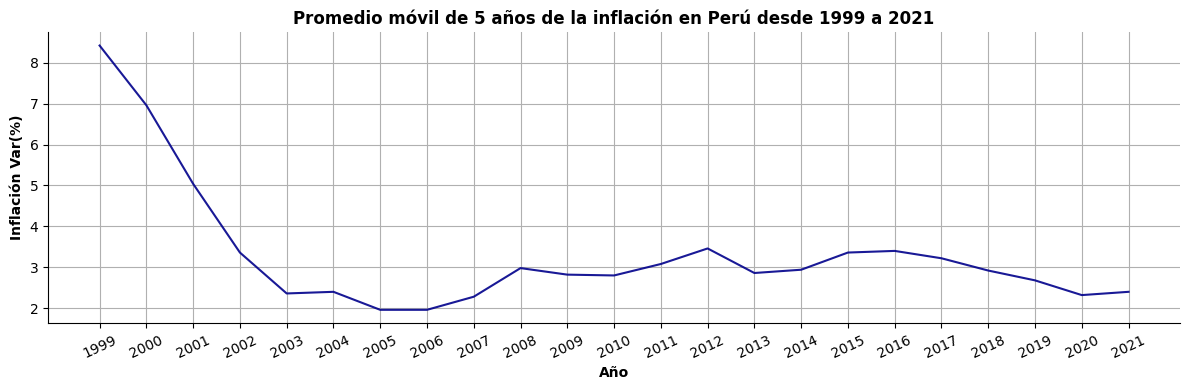

In [805]:
#Filtrando la data desde 1995
data_filtered = data.copy()
data_filtered = data_filtered[data_filtered['Año'] >= 1995]
# Calculando promedio movil de 5 años de la inflación desde 1995
data_filtered['media_movil_5'] = data_filtered['Peru_inflación'].rolling(window=5).mean()

# Graficando la inflación suavizada
fig, ax = plt.subplots(figsize=(12,4))

# Filtrando los datos desde 1999
x = data_filtered.Año[data.Año >= 1999]
y = data_filtered.media_movil_5[data.Año >= 1999]

ax.plot(x, y, label='Inflacion_media_movil_5_años', color='darkblue', alpha=0.9)

# Seleccionando cada segundo tick
ticks = x[::1]

ax.set_xticks(ticks)
plt.xticks(rotation=25)

plt.title("Promedio móvil de 5 años de la inflación en Perú desde 1999 a 2021", weight='bold')
plt.xlabel("Año", weight='bold')
plt.ylabel("Inflación Var(%)", weight='bold')
plt.grid(True)
sns.despine()
plt.tight_layout()
plt.show()

#### **¿Desde qué año el promedio la inflación peruana se encuentra debajo del 3 %? ¿Ha habido algún año que se desvía de esta trayectoria?**

### 📉 Evolución de la Inflación en Perú (2003-2021)

### 🔍 **Análisis General**
Desde **2003**, el promedio de la inflación en Perú se mantiene estable **por debajo del 3 %** hasta fines de **2010**, con una única excepción notable en **2012** 📈, donde el promedio supera ese nivel. Luego, entre **2013 y 2014**, vuelve a situarse ligeramente por debajo del 3 %.

Sin embargo, entre **2015 y 2017** ⚠️, se observa una **desviación considerable**, indicando un aumento en el promedio de la inflación. A partir de **2018**, el promedio desciende de manera significativa, manteniéndose en una **tendencia a la baja** 📉 hasta **2021**. Esto refleja tanto políticas económicas como situaciones coyunturales que afectaron la estabilidad inflacionaria en esos años.

### 📊 **Factores Económicos Clave**
La trayectoria de la inflación en Perú desde **2003** refleja un **control efectivo** gracias a la adopción del **esquema de metas de inflación** por parte del Banco Central de Reserva del Perú (BCRP) en **2002**, lo que permitió una reducción sostenida de la inflación por debajo del **3 %** hasta **2010**. 

Sin embargo, en **2012**, la inflación superó temporalmente el **3 %** 📈 debido a **choques externos**, como el aumento de los precios de los alimentos y materias primas **(Morón y Quispe, 2013).**

Entre **2015 y 2017**, la inflación experimentó otra **desviación** ⚠️ debido a fenómenos climáticos como **El Niño** 🌧️, que afectaron la oferta agrícola, y la depreciación del tipo de cambio por factores externos.

A partir de **2018**, la inflación volvió a descender 📉 significativamente, en parte por el menor dinamismo económico global y la estabilidad de las expectativas inflacionarias **(Rossini y Quispe, 2019)**. Estos factores permitieron que la inflación se mantuviera baja hasta **2021**.


## Pregunta 2
#### Mostrar un gráfico de línea doble que muestre el tipo de cambio nominal del dólar y el crecimiento del PBI

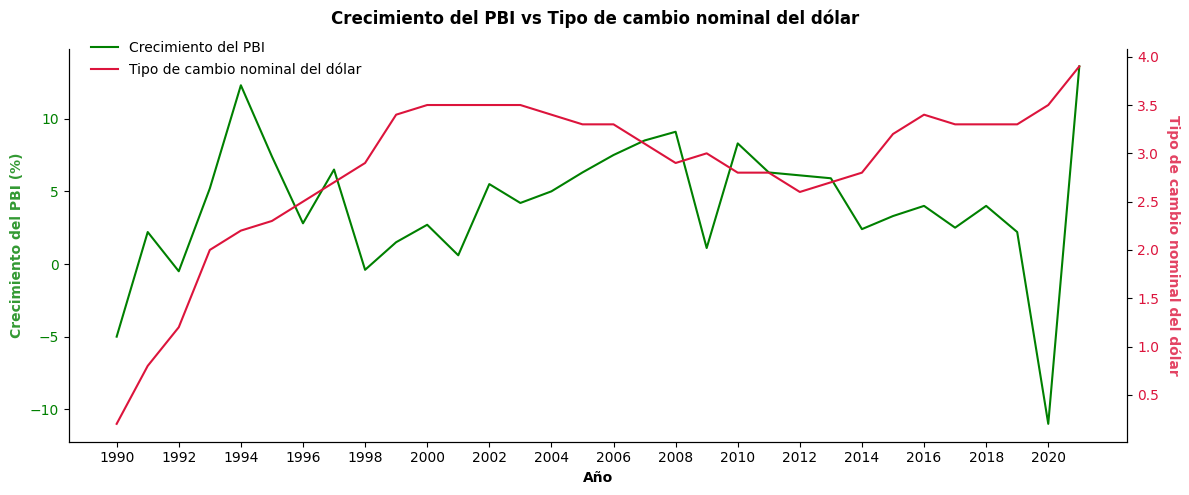

In [804]:
# Filtrando las columnas necesarias
data_doble_graph = data.copy()
data_doble_graph = data[['Año', 'Peru_PBI_por', 'Tipo_de_cambio_dólares']]
# Eliminamos aquellos valores de tipo de cambio que son 0 porque no nos ayudan en la escalabilidad del gráfico
data_doble_graph = data_doble_graph[data_doble_graph['Tipo_de_cambio_dólares'] != 0]

# Creando el gráfico de línea doble
fig, ax1 = plt.subplots(figsize=(12, 5))

# Gráfico del crecimiento del PBI
line1 = sns.lineplot(x='Año', y='Peru_PBI_por', data=data_doble_graph, ax=ax1, color='g', label='Crecimiento del PBI', legend=False)
ax1.set_xlabel('Año', weight='bold')
ax1.set_ylabel('Crecimiento del PBI (%)', color='g', alpha=0.8, weight='bold')
ax1.tick_params(axis='y', labelcolor='g')

# Crear un segundo eje y para el tipo de cambio
ax2 = ax1.twinx()
line2 = sns.lineplot(x='Año', y='Tipo_de_cambio_dólares', data=data_doble_graph, ax=ax2, color='crimson', label='Tipo de cambio nominal del dólar', legend=False)
ax2.set_ylabel('Tipo de cambio nominal del dólar', color='crimson', alpha=0.8, weight='bold', rotation=270, labelpad=15)
ax2.tick_params(axis='y', labelcolor='crimson')

# Ajustar los ticks del eje x para mostrar saltos de 2 años
ticks_1 = data_doble_graph['Año'][::2]
ax1.set_xticks(ticks_1)

# Añadir título y leyenda
fig.suptitle('Crecimiento del PBI vs Tipo de cambio nominal del dólar', weight='bold')
sns.despine(right=False, bottom=False)
fig.tight_layout()

# Obtener las handles y labels de ambos axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Crear la leyenda combinada
ax1.legend(handles=handles1 + handles2, labels=labels1 + labels2,loc='upper left', bbox_to_anchor=(0.009,1.05), edgecolor=None, facecolor=None, frameon=False)

plt.show()

In [192]:
#correlación entre el PBI y el tipo de cambio
data_doble_graph[['Peru_PBI_por', 'Tipo_de_cambio_dólares']].corr()

,Peru_PBI_por,Tipo_de_cambio_dólares
Peru_PBI_por,1.000000,0.210294
Tipo_de_cambio_dólares,0.210294,1.000000


#### **¿Hay alguna relación? ¿Debería haberla? ¿Cómo presentarían la data de la manera más clara, dado que la variable de tipo de cambio tiene una buena cantidad de ceros?**

### 📊 Análisis del Tipo de Cambio y Crecimiento del PIB 🌟

### 1. **¿Hay alguna relación?** 🤔
El gráfico muestra el crecimiento del PBI y el tipo de cambio nominal del dólar. No hay una relación clara entre las dos variables. Esto no es sorprendente, ya que el crecimiento del PBI es un indicador macroeconómico general, mientras que el tipo de cambio es una variable específica del mercado de divisas. Cabe señalar que el coeficiente de correlación es de 0.21 lo cual no es un indicador de movimiento correlacionado fuerte. En algunos períodos, ambas variables parecen moverse en la misma dirección, mientras que en otros momentos se mueven en direcciones opuestas.

### 2. **¿Debería haberla?** 💭
La relación entre estas dos variables es compleja y puede verse influenciada por una multitud de factores, tanto internos como externos a la economía. Si bien teóricamente se espera una cierta relación (por ejemplo, una depreciación del tipo de cambio puede estimular las exportaciones y, en consecuencia, el crecimiento económico), en la práctica esta relación puede ser débil o incluso negativa debido a otros factores que están en juego. Sin embargo, es importante recordar que el tipo de cambio puede tener un impacto en el crecimiento del PBI. Por ejemplo, una apreciación del tipo de cambio puede hacer que las exportaciones sean más caras y las importaciones más baratas, lo que puede tener un impacto negativo en el crecimiento del PBI. Del mismo modo, una depreciación del tipo de cambio puede hacer que las exportaciones sean más baratas y las importaciones más caras, lo que puede tener un impacto positivo en el crecimiento del PBI.

### 3. **¿Cómo presentar la data de manera clara?** 📈
Es esencial filtrar los valores cero, ya que no aportan información útil y el gráfico se ve distorsionado. Usaremos un **gráfico de líneas doble** para comparar visualmente ambas variables. Asimismo, dado que la variable del **tipo de cambio nominal del dólar** puede tener una buena cantidad de decimales, es recomendable utilizar una escala adecuada para visualizar los datos de manera clara. Una opción podría ser utilizar una escala logarítmica para el eje **Y** del tipo de cambio. Esto comprimiría los valores más grandes y expandiría los valores más pequeños, haciendo que las variaciones sean más visibles.

---

### **Referencias** 📚
- Krugman, P., & Obstfeld, M. (2018). *International Economics: Theory and Policy*.
- Mundell, R. A. (1963). *Capital Mobility and Stabilization Policy*.

## Pregunta 3
#### Mostrar un gráfico de barras con los 10 años de mayor crecimiento de PBI durante los 100 años del dataset

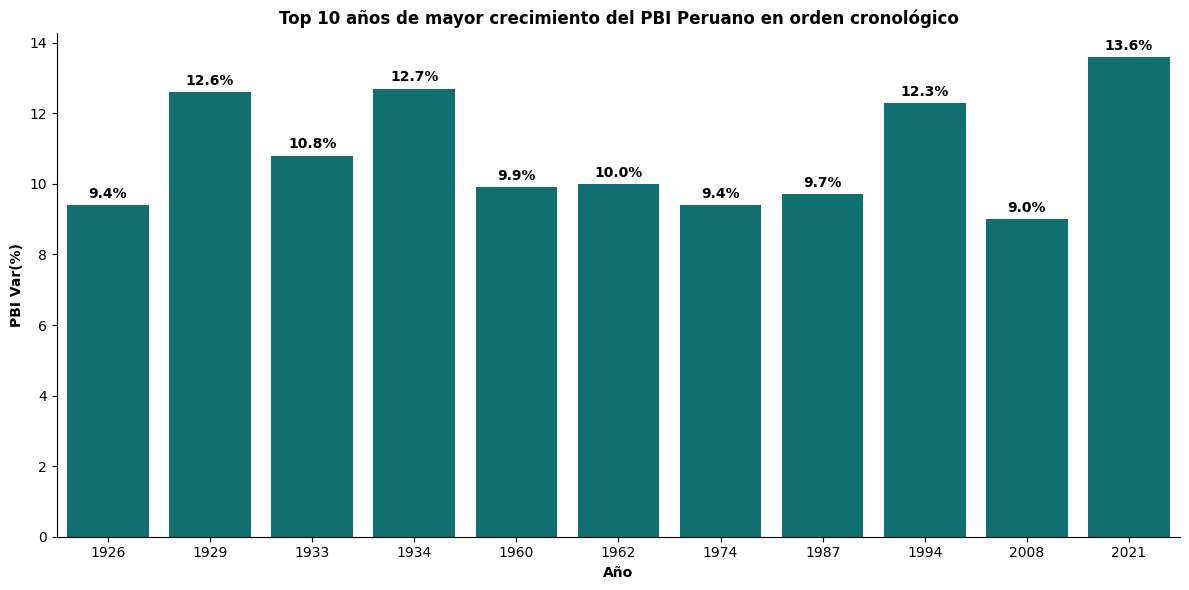

In [743]:
# Filtrar los 10 años de mayor crecimiento del PBI
data_10_years = data.copy()
data_2008 = data_10_years[data_10_years['Año'] == 2008]
data_10_years = data_10_years[['Año', 'Peru_PBI_por', 'PBI']].sort_values(by='Peru_PBI_por', ascending=False).head(10)
data_10_years['Año'] = data_10_years['Año'].astype(int)
data_10_years = data_10_years.append(data_2008[['Año','Peru_PBI_por', 'PBI']].astype(int))  # Ajustar el año para que coincida con el año real
# Ordenar por Año de menor a mayor
data_10_years = data_10_years.sort_values(by='Año')
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(x='Año', y='Peru_PBI_por', data=data_10_years, color='teal')


data_dict = data_10_years.set_index('Año')['Peru_PBI_por'].to_dict()

# Añadir etiquetas de porcentaje de variación a cada barra
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    # Obtener el año de data_10_years usando el índice
    year = data_10_years.iloc[i]['Año']
    if year in data_dict:
        pbi_por = data_dict[year]
        ax.annotate(f'{pbi_por:.1f}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points", 
                    ha='center', va='bottom', fontsize=10, color='black', weight='bold')

# Limpiar bordes innecesarios del gráfico
sns.despine(left=False, bottom=False)

# Añadir título y etiquetas
plt.title("Top 10 años de mayor crecimiento del PBI Peruano en orden cronológico", weight='bold')
ax.set_xlabel("Año", weight='bold')
ax.set_ylabel("PBI Var(%)", weight='bold')  # Ajusta esta etiqueta según corresponda

# Ajustar diseño y mostrar gráfico
plt.grid(False)
plt.tight_layout()
plt.show()

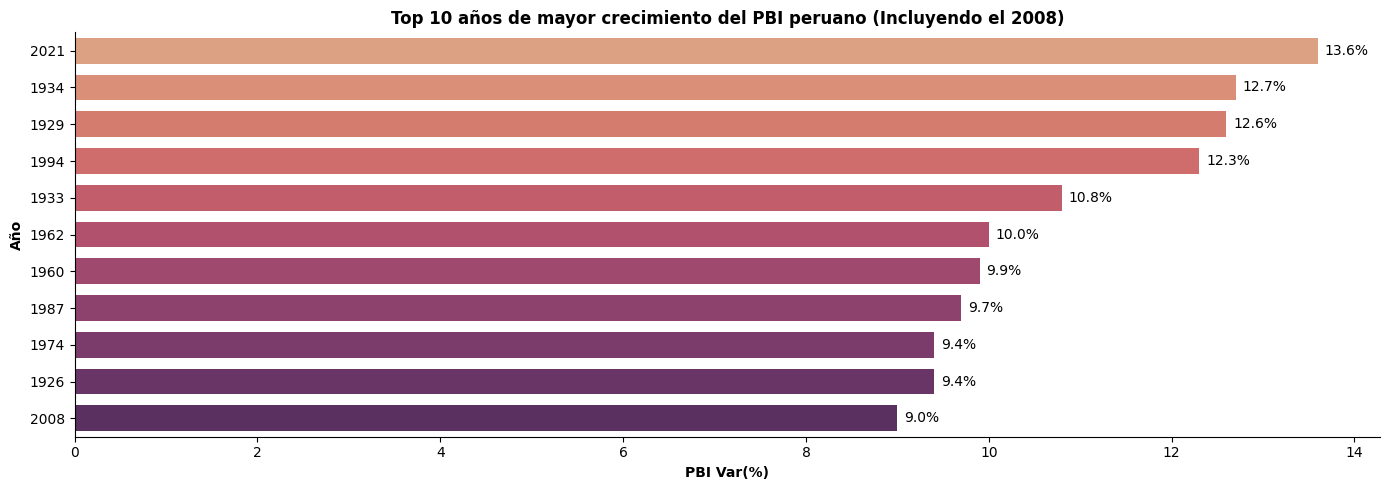

In [742]:
# Filtrar los 10 años de mayor crecimiento del PBI
data_10_years = data.copy()
data_2008 = data_10_years[data_10_years['Año'] == 2008] # Seleccionar el año 2008 porque en la pregunta se menciona analizar dicho año
data_10_years = data_10_years[['Año', 'Peru_PBI_por', 'PBI']].sort_values(by='Peru_PBI_por', ascending=False).head(10)
data_10_years['Año'] = data_10_years['Año'].astype(int)
data_10_years = pd.concat([data_10_years, data_2008[['Año', 'Peru_PBI_por', 'PBI']].astype(int)]) #Appendeando el año 2008 al dataframe

# Crear el gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(14, 5))
bars = sns.barplot(x='Peru_PBI_por', y='Año', data=data_10_years, 
                palette='flare', orient='h', 
                order=data_10_years.sort_values('Peru_PBI_por', ascending=False)['Año'],
                width=0.7)

# Añadir etiquetas de porcentaje de variación a cada barra
for i, bar in enumerate(bars.patches):
    width = bar.get_width()
    year = data_10_years.iloc[i]['Año']
    pbi_por = data_10_years.iloc[i]['Peru_PBI_por']
    ax.annotate(f'{pbi_por:.1f}%',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),  # 5 puntos de desplazamiento horizontal
                textcoords="offset points",
                ha='left', va='center', fontsize=10, color='black')

# Limpiar bordes innecesarios del gráfico
sns.despine(left=False, bottom=False)

# Añadir título y etiquetas
plt.title("Top 10 años de mayor crecimiento del PBI peruano (Incluyendo el 2008)", weight='bold')
ax.set_xlabel("PBI Var(%)", weight='bold')
ax.set_ylabel("Año", weight='bold')

# Ajustar diseño y mostrar gráfico
plt.grid(False)
plt.tight_layout()
plt.show()

### 📊 **Explicación del crecimiento del PIB en 2008, 1994 y 2021**

#### 🌍 **2008: Crisis Financiera Global y Resiliencia del Perú**
En el año 2008, el mundo atravesó la **crisis financiera global**, una de las recesiones más importantes desde la Gran Depresión. A pesar de ello, Perú mostró un crecimiento del PIB del 9.0%. Esto se debió a varios factores clave:

- 📈 **Crecimiento sostenido previo**: Desde inicios de los 2000, Perú venía experimentando un auge económico impulsado por las exportaciones de minerales y la estabilidad macroeconómica.
- 🛠️ **Políticas anticíclicas**: El gobierno implementó medidas como aumento en el gasto de infraestructura y reducción de impuestos para estimular la demanda interna.
- 🌐 **Mercados internacionales**: A pesar de la caída de los precios de las materias primas, la demanda de minerales como el cobre ayudó a mitigar el impacto. Según **Castillo y Landa (2009)**, la diversificación comercial fue clave.

#### 🏛️**1994: Liberalización y Estabilización**
El crecimiento del PIB en 1994 fue del 12.3%, como resultado de las reformas estructurales:

- 💼 **Reformas económicas**: Durante el gobierno de Alberto Fujimori, Perú privatizó empresas estatales, liberalizó mercados y estabilizó la inflación.
- 🔄 **Estabilidad macroeconómica**: Estas reformas permitieron una rápida recuperación económica, impulsada por la inversión extranjera. **Quispe y Zegarra (1995)** destacan que la apertura económica fue crucial para revitalizar sectores clave.

#### 💉 **2021: Recuperación Post-Pandemia**
En 2021, Perú registró un crecimiento del 13.6%, el mayor en casi un siglo, gracias a la **recuperación post-pandemia** de COVID-19:

- 📉 **Caída previa en 2020**: La economía se contrajo un 11.1% en 2020, pero en 2021, la reactivación fue rápida gracias al efecto rebote.
- 💸 **Políticas expansivas**: El gobierno implementó estímulos fiscales y programas de apoyo a pymes.
- 🛢️ **Auge de las materias primas**: El precio del cobre alcanzó máximos históricos, lo que fue clave para la recuperación del país. **Arce y Velarde (2021)** mencionan que esto impulsó los ingresos por exportaciones.

---

#### 📚 **Fuentes:**
- Castillo, M., & Landa, G. (2009). _Crisis financiera global: impactos y respuestas en la economía peruana_. Lima: Universidad del Pacífico.
- Quispe, A., & Zegarra, L. (1995). _Reformas estructurales y crecimiento económico en Perú_. Lima: Banco Central de Reserva del Perú.
- Arce, J., & Velarde, L. (2021). _La economía peruana post-pandemia: Retos y oportunidades_. Lima: Instituto Peruano de Economía.


## Pregunta 4
#### Mostrar un gráfico de barras con los 10 años de menor crecimiento del PBI durante los 100 años del dataset

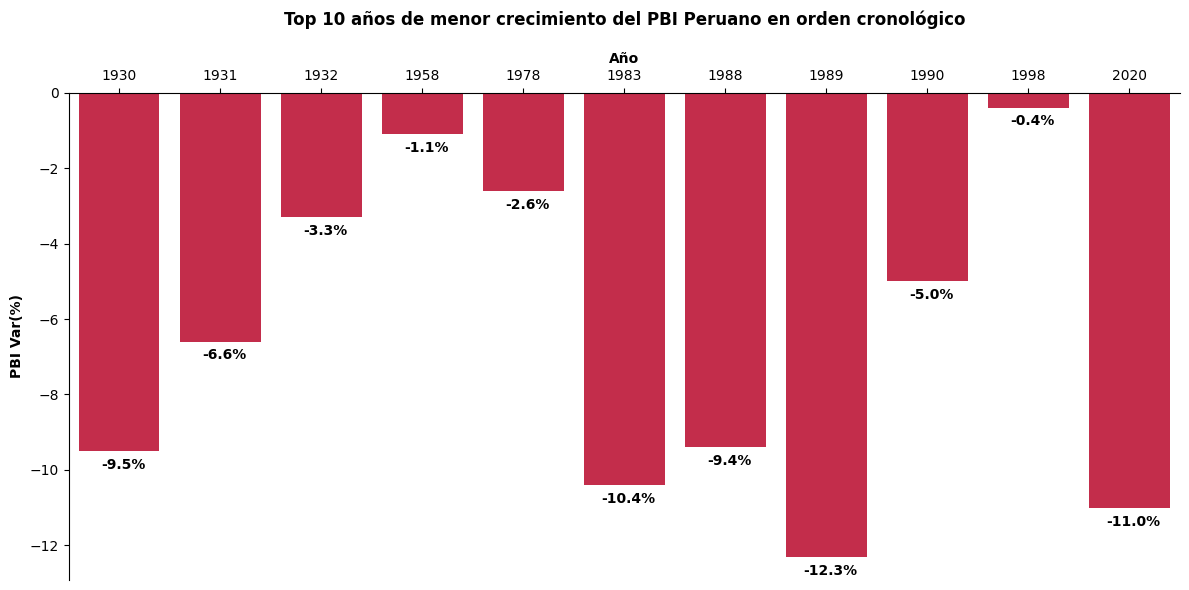

In [741]:
# Filtrar los 10 años de menor crecimiento del PBI
data_10_less = data.copy()
data_1998 = data_10_less[data_10_less['Año'] == 1998]
data_10_less = data_10_less[['Año', 'Peru_PBI_por', 'PBI']].sort_values(by='Peru_PBI_por', ascending=True).head(10)
data_10_less = data_10_less.append(data_1998[['Año','Peru_PBI_por', 'PBI']])
data_10_less['Año'] = data_10_less['Año'].astype(int)  # Ajustar el año para que coincida con el año real
# Ordenar por Año de menor a mayor
data_10_less = data_10_less.sort_values(by='Año')
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
bars = sns.barplot(x='Año', y='Peru_PBI_por', data=data_10_less, color='crimson')

data_dict = data_10_less.set_index('Año')['Peru_PBI_por'].to_dict()

# Añadir etiquetas de porcentaje de variación a cada barra
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    # Obtener el año de data_10_less usando el índice
    year = data_10_less.iloc[i]['Año']
    if year in data_dict:
        pbi_por = data_dict[year]
        ax.annotate(f'{pbi_por:.1f}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(3, -15),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points", 
                    ha='center', va='bottom', fontsize=10, color='black', weight='bold')

# Limpiar bordes innecesarios del gráfico
sns.despine(left=False, bottom=True, top=False)

# Añadir título y etiquetas
plt.title("Top 10 años de menor crecimiento del PBI Peruano en orden cronológico", weight='bold', pad=20)
ax.set_xlabel("Año", weight='bold')
ax.set_ylabel("PBI Var(%)", weight='bold')  # Ajusta esta etiqueta según corresponda

# Invertir el eje y para que vaya de 0 a negativo hacia arriba
#ax.invert_yaxis()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
# Ajustar diseño y mostrar gráfico
plt.grid(False)
plt.tight_layout()
plt.show()


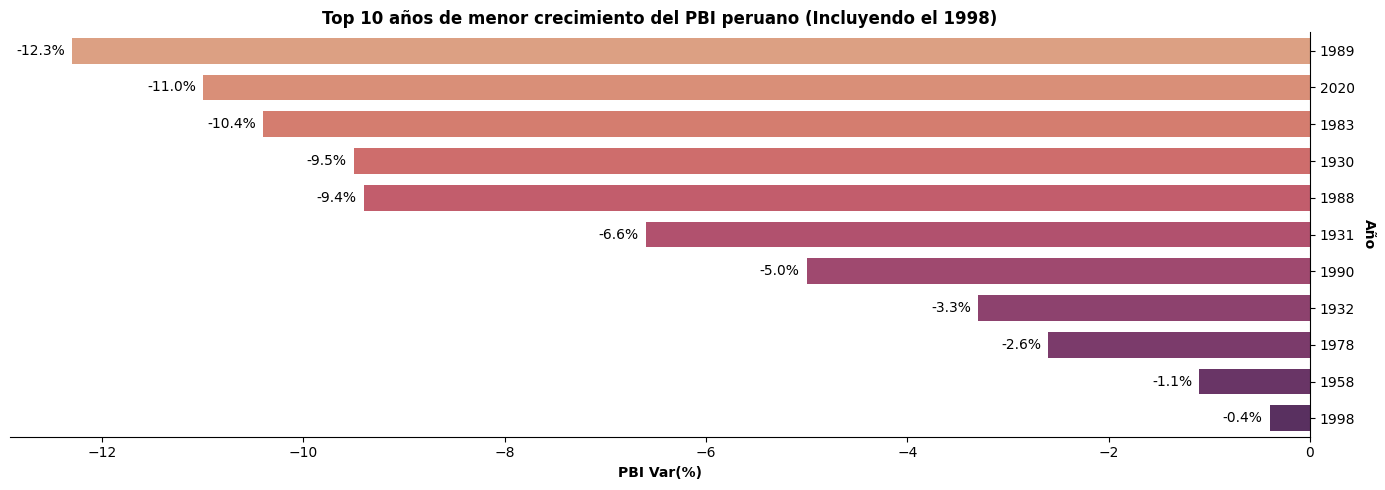

In [740]:
#filtrar los 10 años de menor crecimiento del PBI
data_10_less = data.copy()
data_1998 = data_10_less[data_10_less['Año'] == 1998] # Extraer el año 1998 para el análisis puesto que se nos pide incluirlo
data_10_less = data_10_less[['Año', 'Peru_PBI_por', 'PBI']].sort_values(by='Peru_PBI_por', ascending=True).head(10)
data_10_less = data_10_less.append(data_1998[['Año','Peru_PBI_por', 'PBI']]) 
data_10_less['Año'] = data_10_less['Año'].astype(int)

# Crear el gráfico de barras horizontal
fig, ax1 = plt.subplots(figsize=(14, 5))
bars = sns.barplot(x='Peru_PBI_por', y='Año', data=data_10_less, 
                palette='flare', orient='h', 
                order=data_10_less.sort_values('Peru_PBI_por', ascending=True)['Año'],
                width=0.7)

# Añadir etiquetas de porcentaje de variación a cada barra
for i, bar in enumerate(bars.patches):
    width = bar.get_width()
    year = data_10_less.iloc[i]['Año']
    pbi_por = data_10_less.iloc[i]['Peru_PBI_por']
    if width < 0:
        # Para barras con anchura negativa, coloca la etiqueta a la izquierda
        bars.annotate(f'{pbi_por:.1f}%', 
                      xy=(width, bar.get_y() + bar.get_height() / 2), 
                      xytext=(-5, 0),  # Desplazamiento horizontal hacia la izquierda
                      textcoords="offset points", 
                      ha='right', va='center', fontsize=10, color='black')
    else:
        # Para barras con anchura positiva, coloca la etiqueta a la derecha
        bars.annotate(f'{pbi_por:.1f}%', 
                      xy=(width, bar.get_y() + bar.get_height() / 2), 
                      xytext=(20, 0),  # Desplazamiento horizontal hacia la derecha
                      textcoords="offset points", 
                      ha='left', va='center', fontsize=10, color='black')

# Limpiar bordes innecesarios del gráfico
sns.despine(left=True, bottom=False, right=False)

# Añadir título y etiquetas
plt.title("Top 10 años de menor crecimiento del PBI peruano (Incluyendo el 1998)", weight='bold')
ax1.set_xlabel("PBI Var(%)", weight='bold')
ax1.set_ylabel("Año", weight='bold',rotation=270, labelpad=15)

# Mover el eje y al lado derecho
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()

# Ajustar diseño y mostrar gráfico
plt.grid(False)
plt.tight_layout()
plt.show()

### 📉 **Explicación del menor crecimiento del PIB en 1988, 1989, 1998 y 2020**

#### 💸 **1988: Hiperinflación y Crisis Económica**
En 1988, el PIB peruano cayó un 9.5%, debido a una profunda crisis económica provocada por la **hiperinflación**. Este período fue caracterizado por:

- 📉 **Políticas económicas fallidas**: El gobierno de Alan García implementó controles de precios y tipos de cambio que resultaron en un colapso económico. **De Soto (1989)** indica que estas medidas causaron distorsiones en el mercado y desincentivaron la inversión.
- 💰 **Hiperinflación**: Perú experimentó tasas de inflación que superaban el 1,700%, lo que desató el caos en la economía. El poder adquisitivo de los peruanos se desplomó, afectando gravemente la demanda interna.
- 📊 **Deuda externa**: La moratoria sobre el pago de la deuda externa complicó las relaciones con los acreedores internacionales, limitando aún más las reservas.

#### 🚨 **1989: Profundización de la Crisis**
En 1989, el PIB sufrió su mayor contracción, cayendo un **-12.3%**, la mayor en la historia reciente del Perú. Esto fue consecuencia directa de:

- 🔥 **Agudización de la hiperinflación**: La inflación alcanzó picos de más del 2,700%, y el gobierno se quedó sin herramientas para enfrentar la crisis.
- 🛑 **Parálisis económica**: La inversión privada desapareció prácticamente, y el país entró en una **parálisis productiva**.
- 🔄 **Aislamiento internacional**: Perú fue excluido de los mercados financieros internacionales, lo que agravó aún más la recesión. **González Vigil (1990)** afirma que el aislamiento financiero y la desconfianza en la moneda nacional fueron elementos clave en la contracción.

#### 🌪️ **1998: Fenómeno El Niño y Crisis Asiática**
En 1998, el Perú experimentó una contracción de **-0.4%**, debido a factores externos que impactaron negativamente la economía:

- 🌊 **Fenómeno El Niño**: Este fenómeno climático devastó las costas peruanas, afectando fuertemente la **agricultura** y la **pesca**, sectores clave en el crecimiento económico.
- 📉 **Crisis financiera asiática**: La crisis en Asia redujo la demanda internacional de minerales y otras materias primas, principales exportaciones de Perú.
- 🏦 **Inestabilidad macroeconómica global**: La incertidumbre en los mercados globales afectó las inversiones extranjeras en el país, lo que limitó la expansión económica. Según **Quispe y Alarcón (2000)**, la combinación de shocks climáticos y económicos externos impactó severamente la economía peruana.

#### 🦠 **2020: Pandemia de COVID-19**
La contracción del PIB en 2020 fue del **-11.0%**, resultado de la **pandemia global de COVID-19**:

- 🔒 **Cuarentenas estrictas**: El Perú implementó uno de los confinamientos más largos y estrictos de la región, afectando la actividad económica.
- 🏭 **Colapso de sectores clave**: El comercio, el turismo y la manufactura fueron duramente golpeados. **Villanueva y Fernández (2021)** destacan que la paralización del sector servicios fue un golpe crítico.
- 💉 **Respuesta fiscal limitada**: A pesar de algunos programas de asistencia, el impacto fiscal fue insuficiente para mitigar la caída en la demanda interna y el empleo. Además, la estructura económica informal dificultó una respuesta efectiva.
---
#### 📚 **Fuentes:**
- De Soto, H. (1989). _El Otro Sendero: La Revolución Informal_. Lima: Instituto Libertad y Democracia.
- González Vigil, F. (1990). _Crisis y recuperación: el Perú en la década de los 80_. Lima: Pontificia Universidad Católica del Perú.
- Quispe, R., & Alarcón, M. (2000). _Impacto del Fenómeno El Niño en la economía peruana_. Lima: Instituto Peruano de Economía.
- Villanueva, M., & Fernández, P. (2021). _COVID-19 y sus efectos económicos en Perú_. Lima: Banco Central de Reserva del Perú.


## Pregunta 5
#### Mostrar un gráfico de barras con los últimos 40 años del crecimiento del PBI


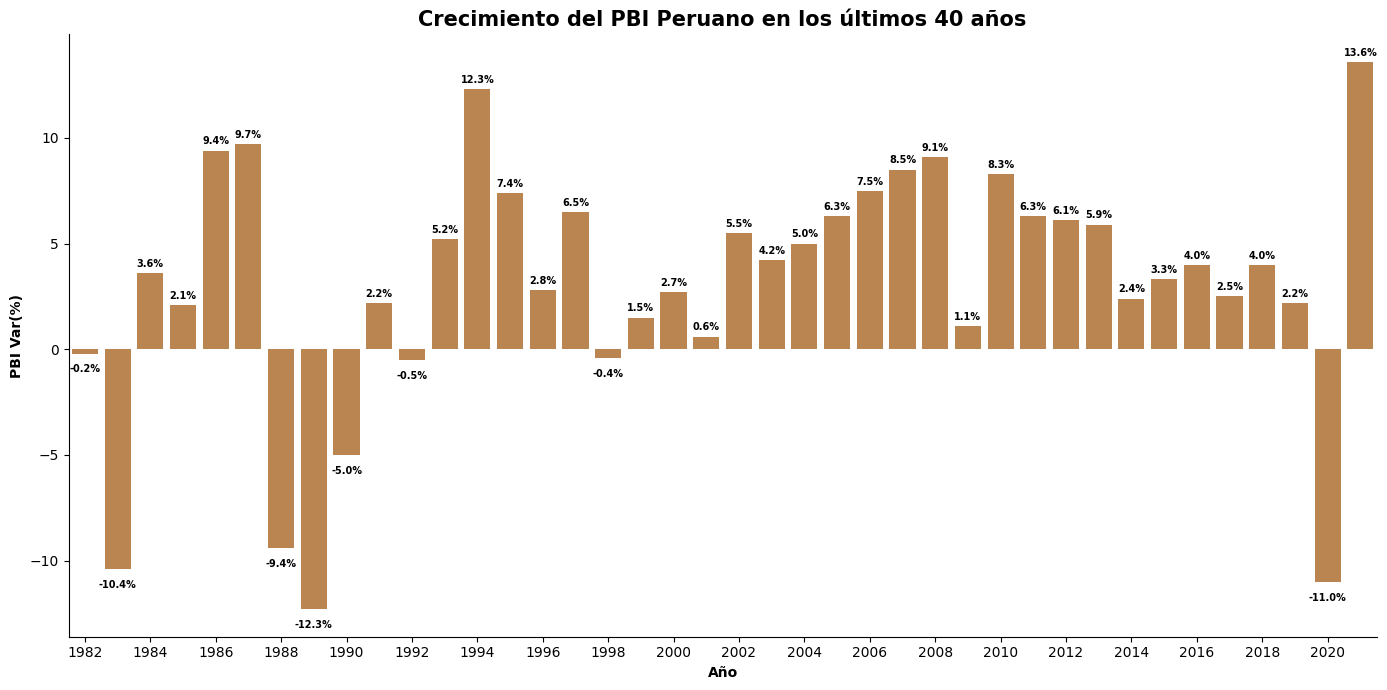

In [753]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los últimos 40 años
data_last_40_years = data.copy()
data_last_40_years['Año'] = data_last_40_years['Año'].astype(int)
data_last_40_years = data_last_40_years.sort_values(by='Año', ascending=False).head(40)
data_last_40_years = data_last_40_years.sort_values(by='Año')  # Ordenar por año de menor a mayor

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(14, 7))
bars = sns.barplot(x='Año', y='Peru_PBI_por', data=data_last_40_years, color='peru', width=0.8)

# Añadir etiquetas de porcentaje de variación a cada barra
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    if height < 0:
        ax.annotate(f'{height:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, -15),  # -15 puntos de desplazamiento vertical
                textcoords="offset points", 
                ha='center', va='bottom', fontsize=7, color='black', weight='bold')
    else:
        ax.annotate(f'{height:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                textcoords="offset points", 
                ha='center', va='bottom', fontsize=7, color='black', weight='bold')

# Limpiar bordes innecesarios del gráfico
sns.despine(left=False, bottom=False)

# Añadir título y etiquetas
plt.title("Crecimiento del PBI Peruano en los últimos 40 años", weight='bold', size=15)
ax.set_xlabel("Año", weight='bold', size=10)
ax.set_ylabel("PBI Var(%)", weight='bold', size=10)
ax.set_xticks(ax.get_xticks()[::2])


# Ajustar diseño y mostrar gráfico
plt.grid(False)
plt.tight_layout()
plt.show()

### 📊 **Hipótesis sobre el Ciclo Económico en Perú**

#### 🧐 **¿Se cumple la teoría del ciclo económico en Perú?**

La **teoría del ciclo económico** propone que las economías experimentan fases recurrentes de **expansión** y **contracción** en el crecimiento del PIB a lo largo del tiempo. Estas fluctuaciones suelen estar vinculadas a shocks internos y externos, variaciones en la demanda, política monetaria y fiscal, entre otros factores. En este gráfico del **crecimiento del PIB peruano en los últimos 40 años**, se observan varias fases que podrían alinearse con la teoría del ciclo económico.

#### 📉 **Hipótesis:**
_"El crecimiento económico de Perú en las últimas cuatro décadas ha seguido un ciclo económico recurrente e irregular a la vez, donde las fases de expansión y contracción están influenciadas principalmente por factores externos como los shocks internacionales (crisis financieras globales, pandemias) y fenómenos naturales (El Niño), así como por cambios en la política económica interna (inflación, políticas fiscales). En el caso peruano estos ciclos son irregulares, asimétricos y volátiles"_

#### 🔍 **Evidencia para el Ciclo Económico en Perú:**

1. **Fases de Contracción**:
   - **1983-1990**: Durante este período se observa una severa recesión, donde el PIB sufrió caídas drásticas, con un **mínimo de -12.3% en 1989**. Las causas fueron principalmente internas, como la **hiperinflación** y el mal manejo de políticas económicas.
   - **1998**: La caida de **-0.4%** del PBI en un periodo de sucesivas expansiones, está asociado con el **Fenómeno El Niño** y la crisis financiera asiática.
   - **2020**: La caída del **-11%** debido a la **pandemia del COVID-19** representa un ciclo recesivo severo, vinculado a un shock global.

2. **Fases de Expansión**:
   - **1993-1997**: Después de las reformas estructurales de los años 90, el Perú vivió una recuperación, alcanzando un crecimiento del **12.3% en 1994**.
   - **2004-2008**: En este período, la economía peruana experimentó un crecimiento sostenido de alrededor del **8%** anual, impulsado por la alta demanda de minerales y la inversión extranjera.
   - **2010-2014**: A pesar de la crisis financiera global de 2008, Perú se recuperó rápidamente, con un crecimiento que superó el **8.3%** en 2010, reflejando una nueva fase de expansión.

#### 🔄 **Características del Ciclo Económico en Perú:**
- **Expansión impulsada por exportaciones**: Durante los años de auge de los commodities, como en 2008 y 2010, la economía peruana mostró fuertes crecimientos.
- **Dependencia de factores externos**: Las fases de contracción severa, como en 2020 y 1998, están relacionadas con shocks internacionales o fenómenos naturales.
- **Crisis internas**: Los periodos de mayor crisis, como los años 80, fueron principalmente causados por factores internos (hiperinflación y crisis política).

#### 🔬 **Conclusión:**
Con base en el gráfico y la evolución histórica, se puede formular la **hipótesis** de que **el ciclo económico en Perú sigue un patrón cíclico**, donde las fases de expansión y contracción están marcadamente influenciadas por eventos externos, pero con episodios críticos debido a problemas internos de gestión económica. Sin embargo, la duración y severidad de estas fases parecen estar condicionadas principalmente por la estructura de la economía (dependencia de commodities) y la capacidad de respuesta a crisis internas y externas.

---
📚 **Fuentes consultadas**:
- Fischer, S., Dornbusch, R., & Schmalensee, R. (2011). _Economía._ Lima: Editorial Universitaria.
- Banco Central de Reserva del Perú (2022). _Informe Anual._ Lima: BCRP.


## Pregunta 6
#### Mostrar un gráfico de línea doble en que se compara el crecimiento de PBI del Perú de la pregunta anterior contra el crecimiento de EEUU. 

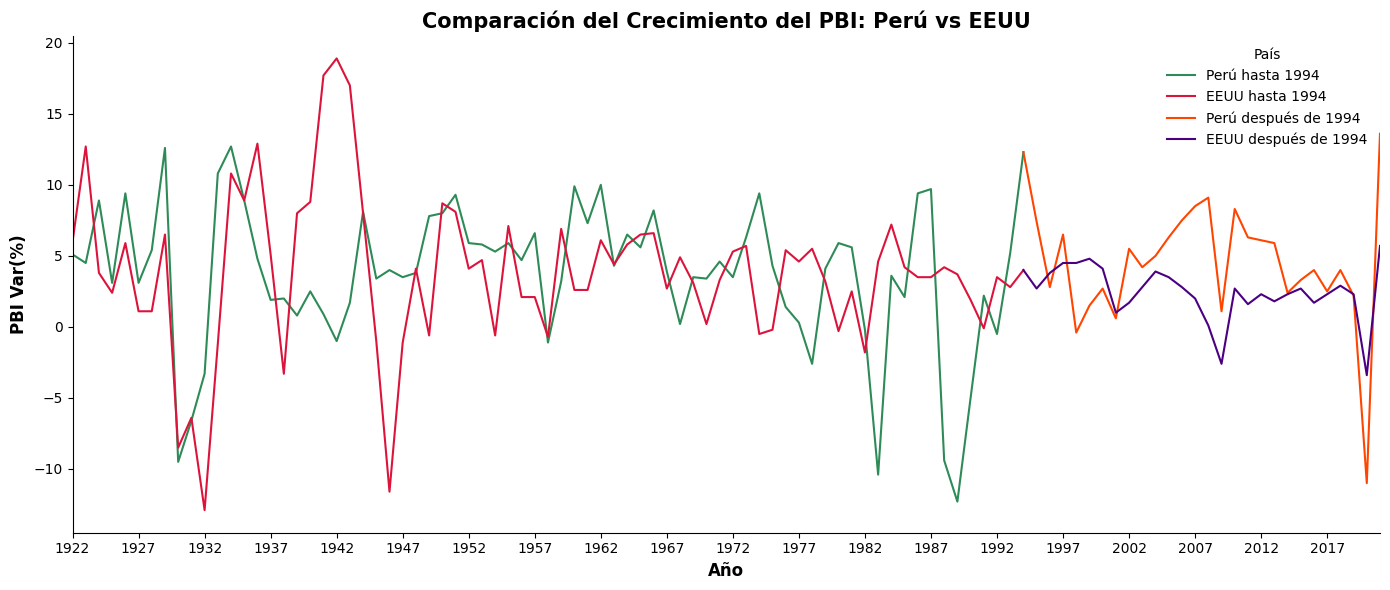

In [859]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una copia de los datos y seleccionar las columnas relevantes
data_compare = data.copy()
data_compare = data_compare[['Año', 'Peru_PBI_por', 'EEUU_PBI_por']]
data_compare['Año'] = data_compare['Año'].astype(int)

# Dividir los datos en dos subconjuntos: hasta 1994 y después de 1994
data_before_1994 = data_compare[data_compare['Año'] <= 1994]
data_after_1994 = data_compare[data_compare['Año'] >= 1994]

# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(14, 6))

# Graficar los datos hasta 1994
sns.lineplot(x='Año', y='Peru_PBI_por', data=data_before_1994, ax=ax, color='seagreen', alpha=1, label='Perú hasta 1994')
sns.lineplot(x='Año', y='EEUU_PBI_por', data=data_before_1994, ax=ax, color='crimson', alpha=1, label='EEUU hasta 1994')

# Graficar los datos después de 1994
sns.lineplot(x='Año', y='Peru_PBI_por', data=data_after_1994, ax=ax, color='orangered', alpha=1, label='Perú después de 1994')
sns.lineplot(x='Año', y='EEUU_PBI_por', data=data_after_1994, ax=ax, color='indigo', alpha=1, label='EEUU después de 1994')

# Establecer los límites del eje x para que el gráfico comience desde el año exacto
ax.set_xlim(data_compare['Año'].min(), data_compare['Año'].max())

# Ajustar los ticks del eje x para que sean de 5 en 5 años
ax.set_xticks(range(data_compare['Año'].min(), data_compare['Año'].max() + 1, 5))

# Añadir título y etiquetas
plt.title("Comparación del Crecimiento del PBI: Perú vs EEUU", weight='bold', size=15)
ax.set_xlabel("Año", weight='bold', size=12)
ax.set_ylabel("PBI Var(%)", weight='bold', size=12)
sns.despine(right=True, top=True)

# Añadir leyenda combinada
ax.legend(title='País', title_fontsize='10', fontsize='10', frameon=False)

# Ajustar diseño y mostrar gráfico
plt.grid(False)
plt.tight_layout()
plt.show()


### 📊 **Comparación del Crecimiento del PBI: Perú vs. EEUU**

#### 1. **¿Qué información nueva nos proporciona esta comparación?**

La comparación del **crecimiento del PBI** entre **Perú y Estados Unidos** nos permite observar cómo han evolucionado las tasas de crecimiento de dos economías muy diferentes a lo largo del tiempo. Algunas observaciones clave del gráfico:

- **Mayor volatilidad en Perú**: El PBI de Perú, especialmente antes de 1994, muestra una mayor volatilidad en comparación con Estados Unidos. Hay caídas y subidas mucho más pronunciadas, lo que refleja una economía más dependiente de shocks internos y externos.
- **Estados Unidos presenta estabilidad**: El crecimiento de EE.UU. muestra fluctuaciones menos extremas, destacando un ciclo económico más predecible y estable, especialmente después de la **Gran Depresión** de los años 30.
- **Cambios en la política económica de Perú**: Después de 1994, Perú experimenta un crecimiento menos volátil, indicando las reformas estructurales que contribuyeron a una mayor estabilidad.

#### 2. **¿Se cumple la teoría del ciclo económico en EEUU?**

Sí, se puede argumentar que la teoría del ciclo económico también se cumple en **EE.UU.**:

- **Fases de expansión y contracción**: A lo largo de los años, Estados Unidos ha experimentado las fases clásicas de expansión y contracción. Por ejemplo, los picos de crecimiento en los años posteriores a la Segunda Guerra Mundial y la recesión de los años 30 son consistentes con los ciclos económicos.
- **Crisis económicas**: En el gráfico se aprecian las recesiones más notorias de **1974**, la crisis financiera de **2008** y el impacto del **COVID-19** en 2020.
  
A diferencia de Perú, la volatilidad de Estados Unidos es más moderada, debido a su economía más diversificada y a su capacidad de implementar políticas macroeconómicas contracíclicas efectivas.

#### 3. **¿Existe mayor o menor coincidencia en las tasas de crecimiento después de 1994?**

- **Mayor coincidencia**: Después de **1994**, el crecimiento de Perú y Estados Unidos parece converger en algunas ocasiones. Esto puede deberse a la globalización y a la mayor interconexión de las economías. Por ejemplo, ambos países sufrieron los impactos de la crisis de 2008 y del COVID-19 en 2020.
- **Menor volatilidad en Perú**: La volatilidad del crecimiento en Perú disminuye después de 1994, lo que podría explicar la convergencia con Estados Unidos. A medida que Perú implementó reformas económicas estructurales, su economía se estabilizó, y los ciclos económicos comenzaron a parecerse más a los de EE.UU.

#### 🔬 **Conclusión**

La comparación sugiere que **EE.UU. sigue el ciclo económico clásico**, con fases más estables y menos pronunciadas que Perú, lo que refleja una economía más madura. **Perú**, por su parte, muestra una convergencia con EE.UU. después de 1994, reflejando un periodo de mayor estabilidad y menor volatilidad en su crecimiento. Sin embargo, la volatilidad histórica de Perú, especialmente antes de las reformas estructurales, sigue siendo evidente.

---

📚 **Fuentes consultadas**:
- Dornbusch, R., Fischer, S., & Startz, R. (2010). _Macroeconomics._ McGraw-Hill.
- Banco Central de Reserva del Perú (2023). _Informe Anual._ Lima: BCRP.
- Bureau of Economic Analysis (2023). _National Income and Product Accounts._ Washington D.C.


## Pregunta 7
#### Crear dos columnas en el dataframe que simbolicen el cambio porcentual de la inversión bruta fija pública  y privada. Mostrar un gráfico de dispersión de ambos cambios.